In [1]:
from __future__ import print_function
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline


### Fonction to display one image

In [ ]:
im_shape = [128, 2111]

def plot_im(im):
    plt.figure(figsize=(20, 10))
    plt.imshow(im.reshape(im_shape), aspect='auto')
    plt.grid(False)
    plt.gray()
    plt.show()

### Load files into an array

In [130]:
files = [f for f in glob('*/*.txt') if 'readme' not in f]
print(len(files))
data = np.array([np.loadtxt(f, dtype='int') for f in files])
data_ = data.astype('float32') / data.max()
print(data.shape)

155
(155, 128, 2111)


### Store corresponding labels in another array
- "h" for hand
- "g" for gelpad
- "s" for sponge

In [131]:
labels = [f[0] for f in files]
#print(labels)

### Select one image and display it

Here : 25th instance of sponge

kelu124: I'm using np.sqrt to get a "compressed" image. Usually, a log compression takes place, sqrt can give a first approximation. Using 22th sponge, line 70 for the tests

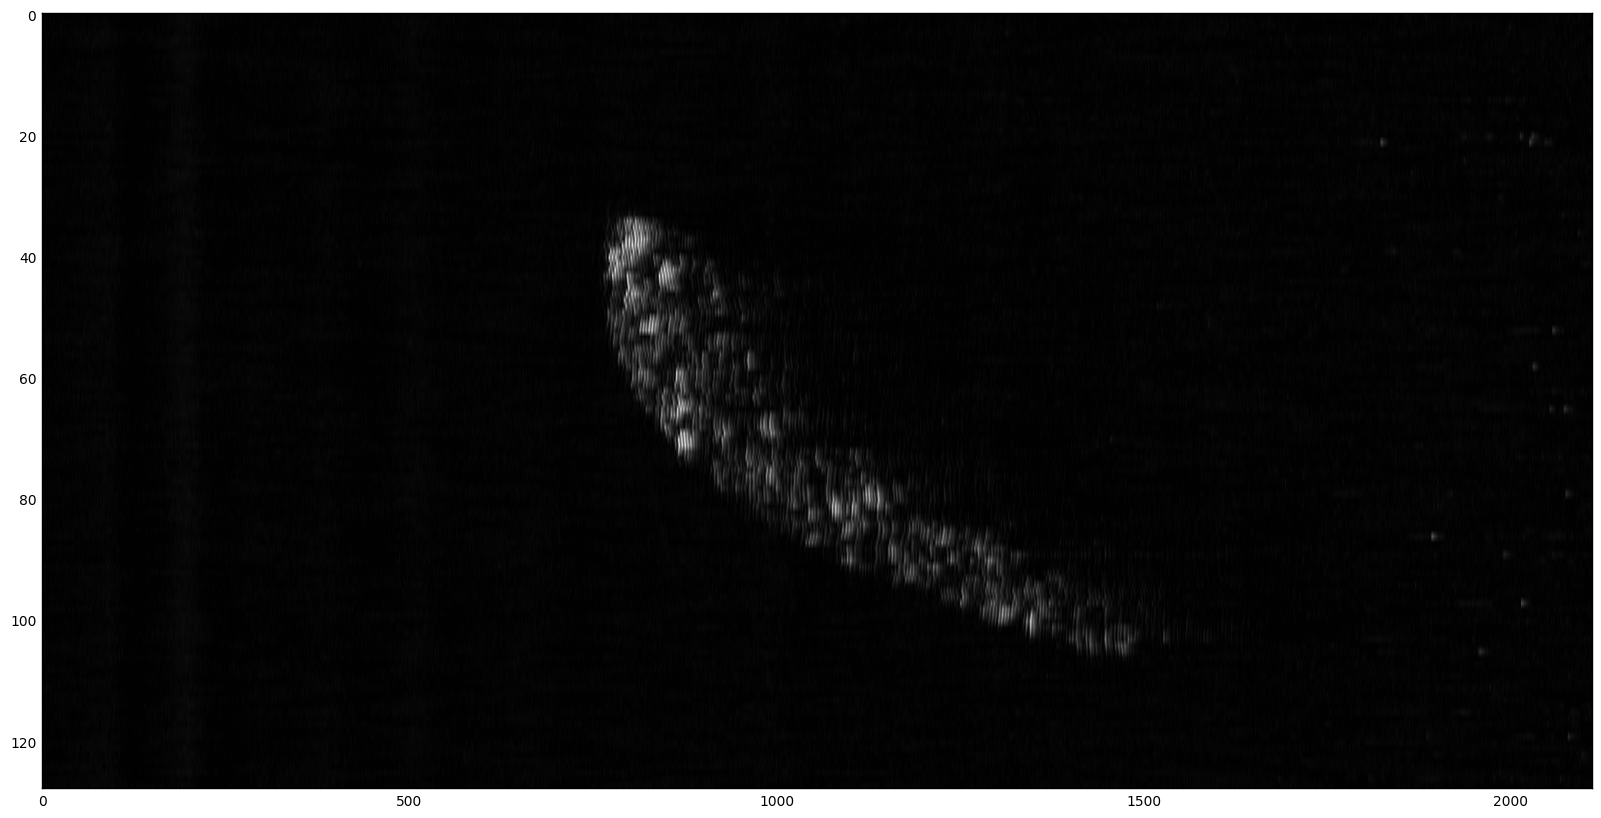

2111


In [184]:
idx_list = np.array([l=='s' for l in labels])
#sample = np.sqrt(data_[idx_list][22])
sample = data_[idx_list][18]
plot_im(sample)
print(len(sample[0]))

### Display fft along horizontal axis

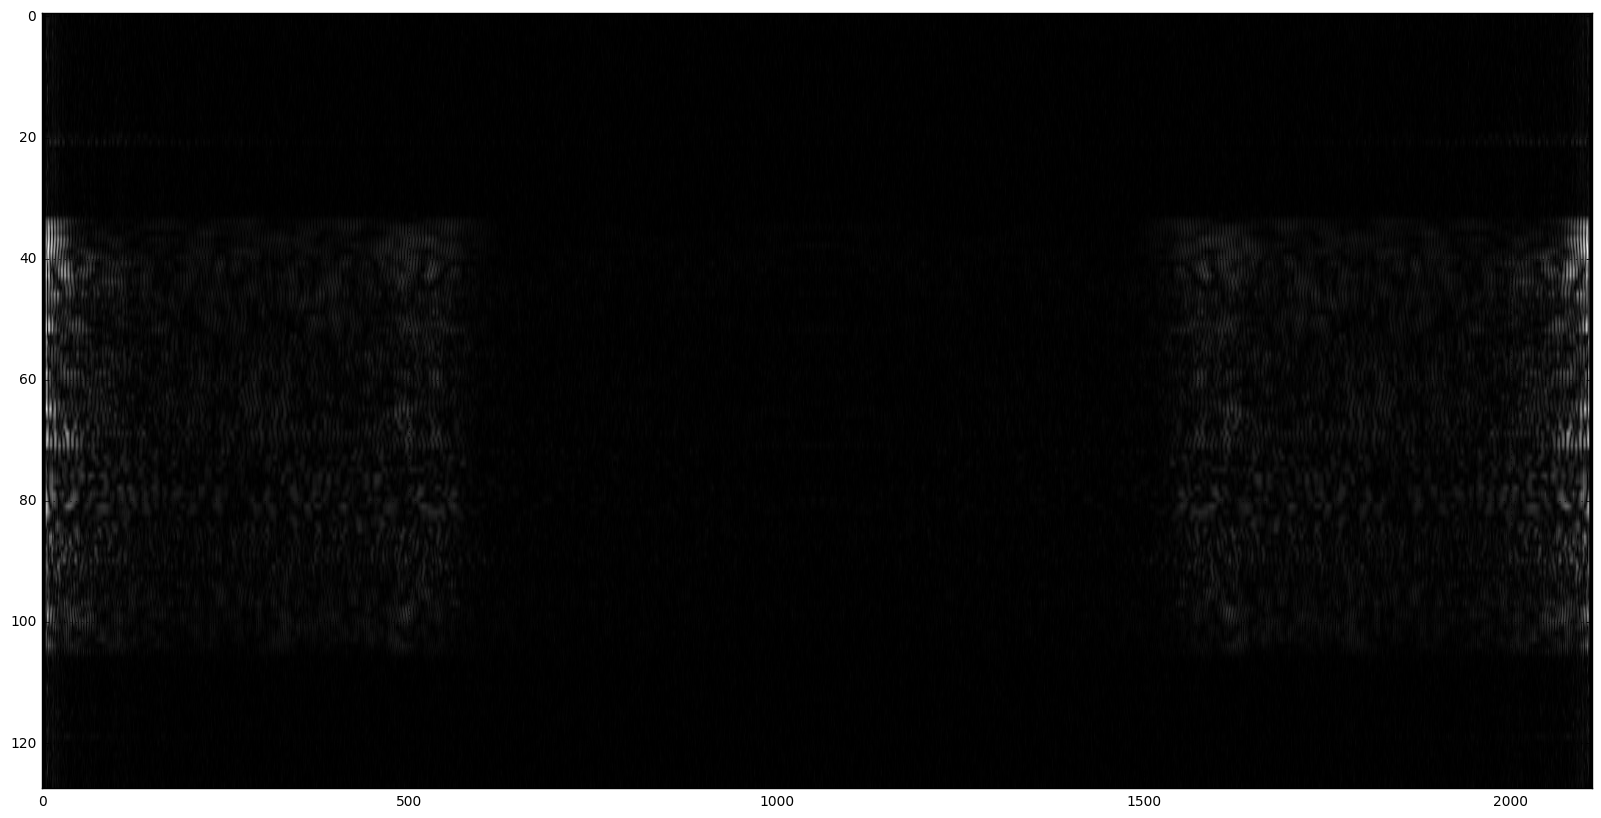

In [185]:
fourier_data = np.fft.fft(sample)
fourier_data_todisplay = np.fft.fft(sample)
for k in range (im_shape[0]):
    for i in range(5):
        fourier_data_todisplay[k][i]=0
        fourier_data_todisplay[k][-1-i]=0
plt.figure(figsize=(20, 10))
plt.imshow(np.abs(np.real(fourier_data_todisplay)).reshape(im_shape), aspect='auto')
#plt.xlim(0, 100)
plt.grid(True)
plt.gray()
plt.show()

## We see a strange pattern around line 70, let's explore it.

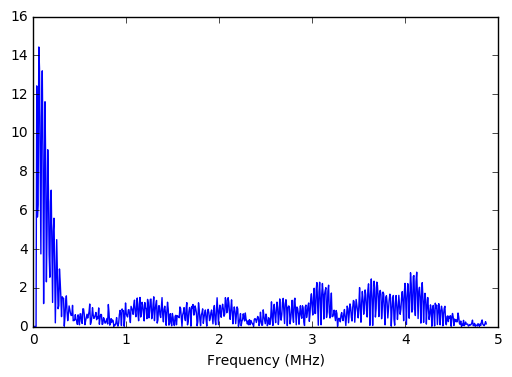

In [191]:
l = float(len(fourier_data_todisplay[70]))
XLimit = int((5.0/8.0)*l/2)
SelectedLine = (np.abs(np.real(fourier_data_todisplay[35])))
XScale = range(XLimit)
for i in range(XLimit):
    XScale[i] = (125.0/8.0)*float(XScale[i])/(1.0*l)
plt.plot(XScale,SelectedLine[0:XLimit]) # avec l'échelle
#plt.plot(SelectedLine[0:XLimit])
plt.xlabel('Frequency (MHz)')
plt.show()

## We rebuild the image (checking image integrity)

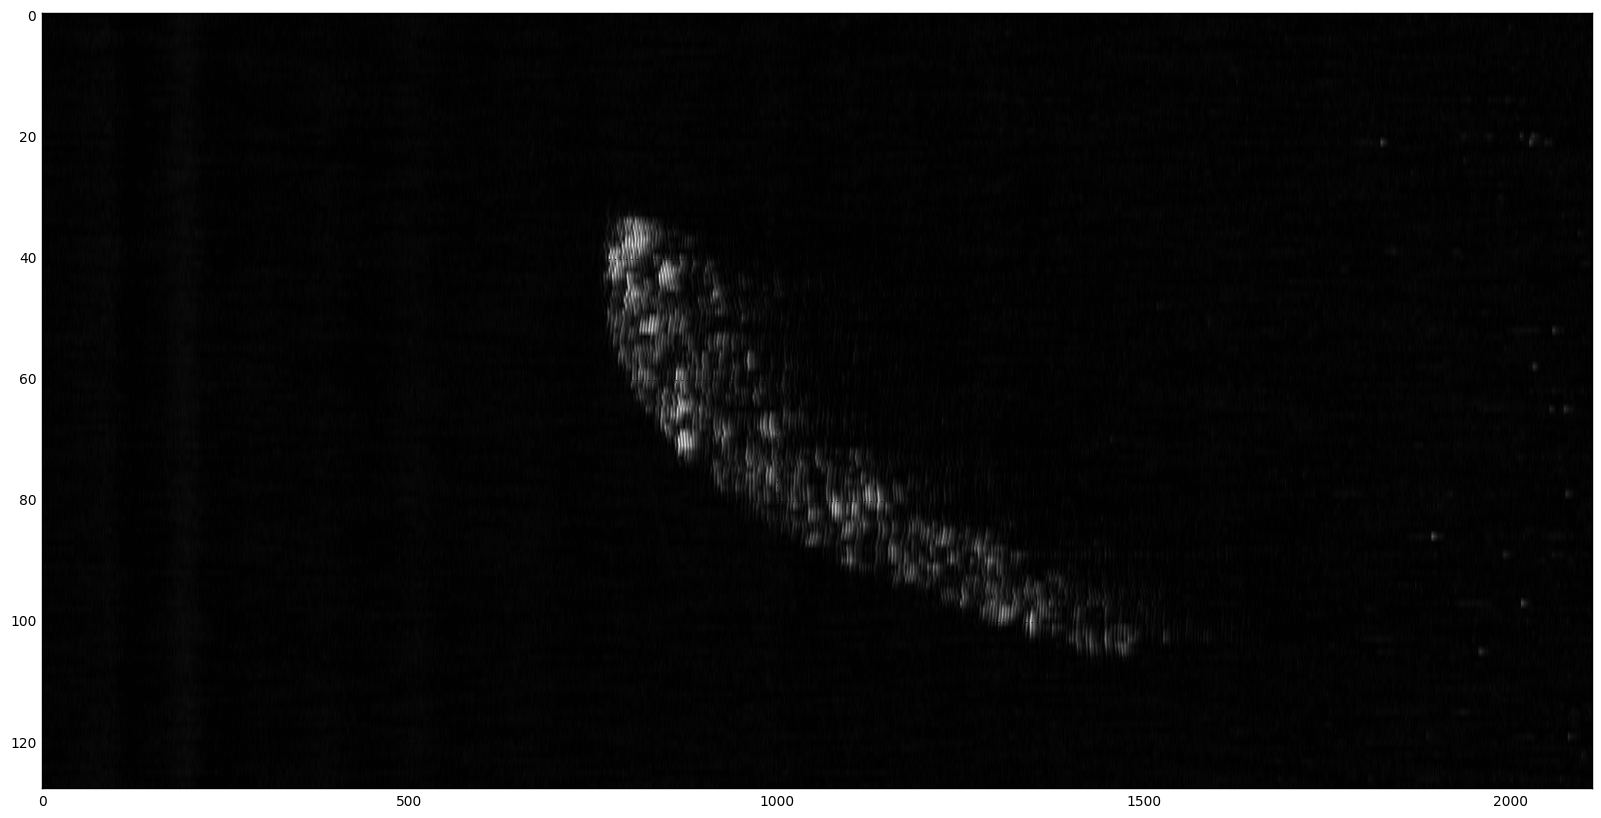

In [187]:
for k in range (im_shape[0]):
    for i in range(im_shape[1]/2):
            if (i > 1000):
                fourier_data[k][i]=0
                fourier_data[k][-i]=0


fourier_data_inverse = np.fft.ifft(fourier_data)
plt.figure(figsize=(20, 10))
plt.imshow(np.abs(fourier_data_inverse).reshape(im_shape), aspect='auto')
plt.grid(True)
plt.gray()
plt.show()